# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\richa\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Load Data

In [2]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [3]:
# Calculate the number of dwelling types units per year (hint: use groupby and sum)
number_of_dwelling_types_units_per_year = to_data.groupby('year').sum()
number_of_dwelling_types_units_per_year.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'], axis=1, inplace=True)
number_of_dwelling_types_units_per_year

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [4]:
# Save the dataframe as a csv file
number_of_dwelling_types_units_per_year.to_csv (r'C:\Users\richa\Desktop\FINTECH PROGRAM\6-PyVIX-Assignment\Starter_Code\number_of_dwelling_types_units_per_year.csv', index = True, header=True)

In [5]:
# # Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    data.plot(kind='bar', color = color, rot = 90)
    plt.title(title, fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

In [6]:
number_of_dwelling_types_units_per_year.iloc[0]

single_detached_house          300930
apartment_five_storeys_plus    355015
movable_dwelling                   75
semi_detached_house             90995
row_house                       52355
duplex                          23785
apartment_five_storeys_less    116900
other_house                      3040
Name: 2001, dtype: int64

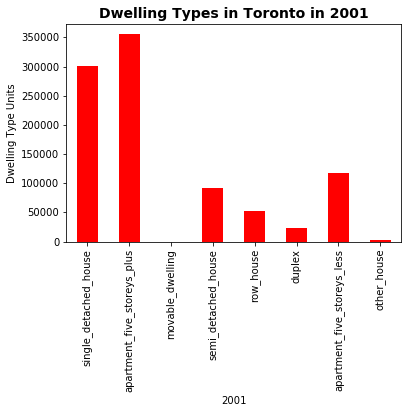

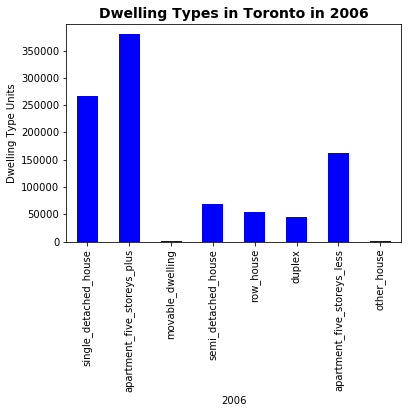

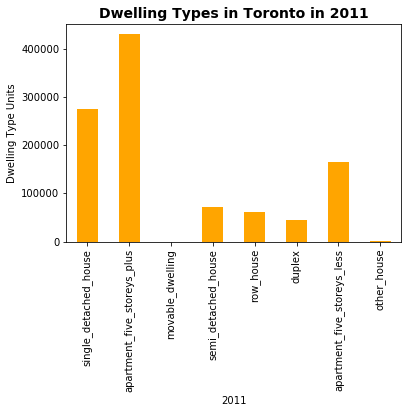

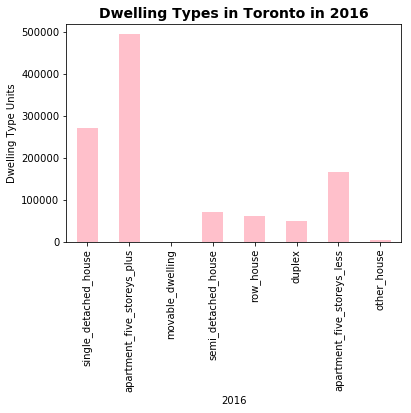

In [8]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(number_of_dwelling_types_units_per_year.iloc[0],
                 "Dwelling Types in Toronto in 2001",
                 "2001",
                 'Dwelling Type Units',
                 'red')

# Bar chart for 2006
create_bar_chart(number_of_dwelling_types_units_per_year.iloc[1],
                 "Dwelling Types in Toronto in 2006",
                 "2006",
                 'Dwelling Type Units',
                 'blue')

# Bar chart for 2011
create_bar_chart(number_of_dwelling_types_units_per_year.iloc[2],
                 "Dwelling Types in Toronto in 2011",
                 "2011",
                 'Dwelling Type Units',
                 'orange')

# Bar chart for 2016
create_bar_chart(number_of_dwelling_types_units_per_year.iloc[3],
                 "Dwelling Types in Toronto in 2016",
                 "2016",
                 'Dwelling Type Units',
                 'pink')


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average monthly shelter costs for owned and rented dwellings
average_monthly_shelter_costs = to_data.groupby('year')[['shelter_costs_owned','shelter_costs_rented']].mean()
average_monthly_shelter_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [10]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    data.plot(color = color)
    plt.title(title,fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

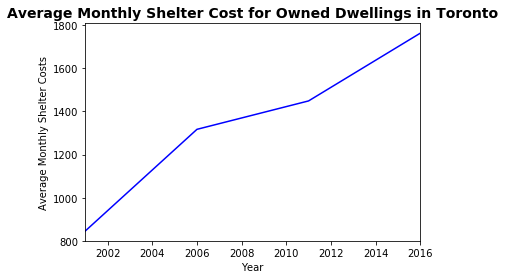

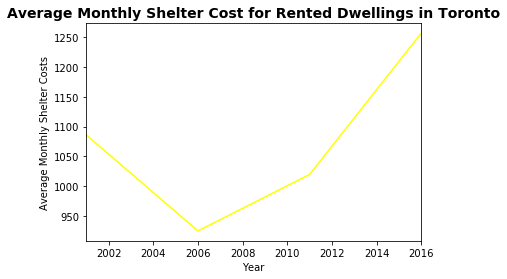

In [11]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(average_monthly_shelter_costs['shelter_costs_owned'],
                 "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
                 "Year",
                 'Average Monthly Shelter Costs',
                 'blue')

# Line chart for rented dwellings
create_line_chart(average_monthly_shelter_costs['shelter_costs_rented'],
                 "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
                 "Year",
                 'Average Monthly Shelter Costs',
                 'yellow')

## Average House Value per Year

In [12]:
# Calculate the average house value per Year
average_house_value_per_Year = to_data.groupby('year')[['average_house_value']].mean()
average_house_value_per_Year['average_house_value']

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

Text(0, 0.5, 'Average House Value')

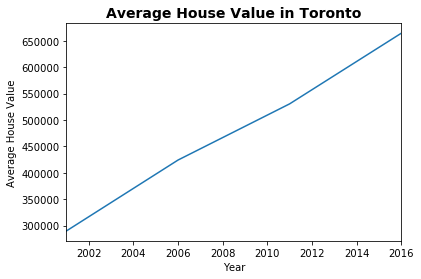

In [13]:
# Plot the average house value per year as a line chart
average_house_value_per_Year['average_house_value'].plot()
plt.title("Average House Value in Toronto",fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
plt.xlabel('Year')
plt.ylabel('Average House Value')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [14]:
# Create a new DataFrame with the mean house values by neighbourhood per year
mean_house_values_by_neighbourhood_per_year = to_data.groupby(['year','neighbourhood'])[['average_house_value']].mean().reset_index()
mean_house_values_by_neighbourhood_per_year.head(10)

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864
5  2001                Bathurst Manor               304749
6  2001           Bay Street Corridor               257404
7  2001               Bayview Village               327644
8  2001         Bayview Woods-Steeles               343535
9  2001          Bedford Park-Nortown               565304

In [15]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
mean_house_values_by_neighbourhood_per_year.hvplot(label = "Average house value per neighbourhood",
                                                  x = 'year',
                                                  y = 'average_house_value',
                                                  xlabel='Year',
                                                  ylabel='Avg. House Value',
                                                  groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [16]:
# Fetch the data of all dwelling types per year
number_of_dwelling_types_per_year = to_data.groupby(['year','neighbourhood']).sum().reset_index()
number_of_dwelling_types_per_year_newdf = to_data.groupby(['year','neighbourhood']).sum().reset_index()
number_of_dwelling_types_per_year_newdf.drop(['average_house_value',
                                                    'shelter_costs_owned',
                                                    'shelter_costs_rented'], 
                                                     axis=1, inplace=True)
number_of_dwelling_types_per_year.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0       1295     195                          185            5   
1        455     105                          425            0   
2         50     185                          370            0   
3        605     275                         3710          165   
4        380      15                         1360            0   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               200388                  810                   870  
1               203047                  806                   892  
2               259998                  817                   924  
3               453850                 1027                  1378  
4               371864                 1007                  1163

In [17]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
number_of_dwelling_types_per_year_newdf.set_index('year').hvplot(kind ="bar",
                                                                 xlabel='Year',
                                                                 ylabel='Dwelling Type Units',
                                                                 groupby='neighbourhood',
                                                                 height = 500).opts(xrotation=90)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [18]:
#Getting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods_new_df = to_data.groupby(['neighbourhood']).mean().reset_index()
top_10_expensive_neighbourhoods = top_10_expensive_neighbourhoods_new_df.sort_values('average_house_value', ascending=False).set_index("neighbourhood").reset_index().head(10)
top_10_expensive_neighbourhoods

neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   
5                      2310.00              0.00               288.75   
6                      1981.25              0.00                43.75   
7                      3392.50              0.00                12.50   
8                       576.25              0.00                66.25   
9                      3948.75              0.00               425.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   
5     201.25   162.5                      1192.50         2.50   
6      57.50   287.5                      1275.00        88.75   
7      16.25    82.5                       402.50         1.25   
8      48.75    20.0                       336.25         2.50   
9     212.50   172.5                      1308.75         6.25   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50  
5            981064.25              1873.75               1547.75  
6            930415.25              1786.75               1255.00  
7            851680.50              1722.75               1245.50  
8            843234.25              1736.75               1622.00  
9            813220.25              1680.75               1369.00

In [19]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods_new_df = to_data.groupby(['neighbourhood'])[['average_house_value']].mean().reset_index()
top_10_expensive_neighbourhoods = top_10_expensive_neighbourhoods_new_df.sort_values('average_house_value', ascending=False).set_index("neighbourhood").head(10)

In [20]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods.hvplot(kind ="bar",
                                       label = "Top 10 Expensive Neighbourhoods in Toronto",
                                       xlabel='Neibourhood',
                                       ylabel='Avg. House Value',
                                       height = 500).opts(xrotation=90)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

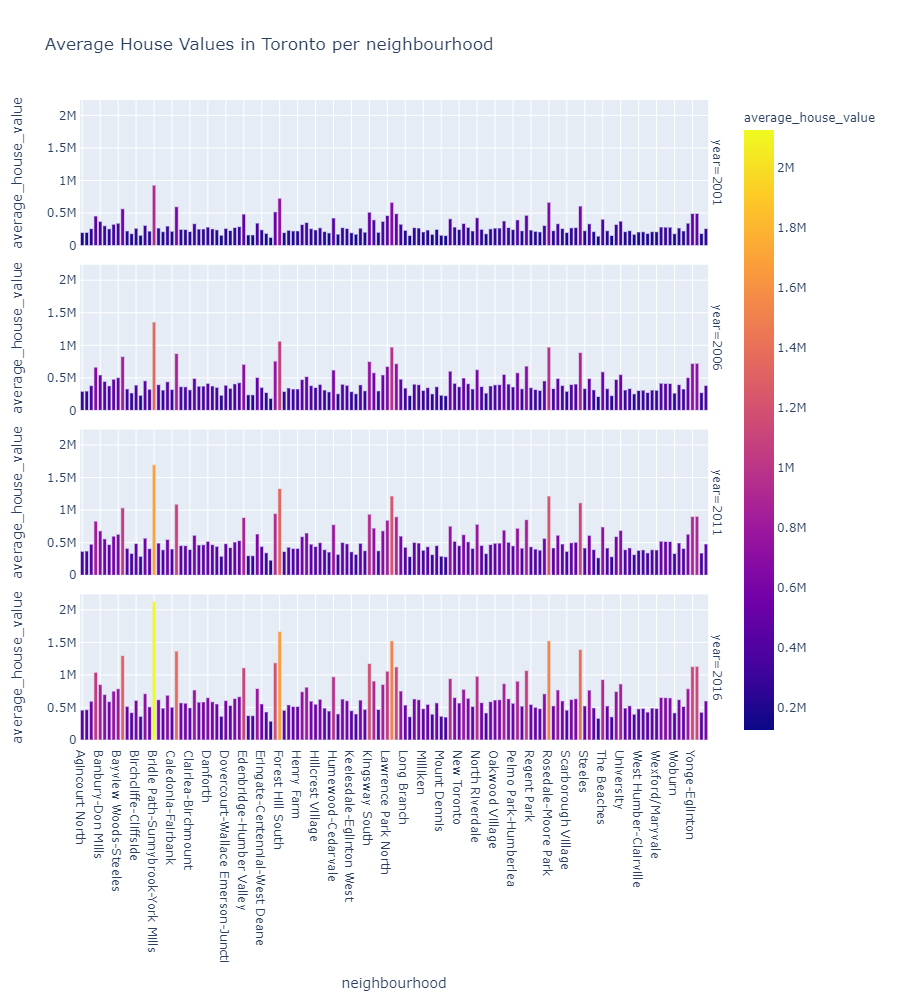

In [21]:
fig = px.bar(mean_house_values_by_neighbourhood_per_year, 
             x="neighbourhood", 
             y="average_house_value", 
             color="average_house_value", 
             facet_row="year",
             title = "Average House Values in Toronto per neighbourhood",
             height=1000,
             width=1000)
fig.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [22]:
# Fetch the data from all expensive neighbourhoods per year.
all_expensive_neighbourhoods_per_year = to_data.groupby(['year','neighbourhood']).sum().reset_index()
top_10_expensive_neighbourhoods_df = all_expensive_neighbourhoods_per_year.sort_values('average_house_value', ascending=False).head(10)

In [23]:
# Fetch the data from all expensive neighbourhoods per year.
all_expensive_neighbourhoods_per_year_2001 = all_expensive_neighbourhoods_per_year.loc[all_expensive_neighbourhoods_per_year['year'] == 2001]
all_expensive_neighbourhoods_per_year_2006 = all_expensive_neighbourhoods_per_year.loc[all_expensive_neighbourhoods_per_year['year'] == 2006]
all_expensive_neighbourhoods_per_year_2011 = all_expensive_neighbourhoods_per_year.loc[all_expensive_neighbourhoods_per_year['year'] == 2011]
all_expensive_neighbourhoods_per_year_2016 = all_expensive_neighbourhoods_per_year.loc[all_expensive_neighbourhoods_per_year['year'] == 2016]

# Store top 10 expensive neighrhoods for each year
top_10_expensive_neighbourhoods_df_2001 = all_expensive_neighbourhoods_per_year_2001.sort_values('average_house_value', ascending=False).head(10)
top_10_expensive_neighbourhoods_df_2006 = all_expensive_neighbourhoods_per_year_2006.sort_values('average_house_value', ascending=False).head(10)
top_10_expensive_neighbourhoods_df_2011 = all_expensive_neighbourhoods_per_year_2011.sort_values('average_house_value', ascending=False).head(10)
top_10_expensive_neighbourhoods_df_2016 = all_expensive_neighbourhoods_per_year_2016.sort_values('average_house_value', ascending=False).head(10)

top_10_expensive_neighbourhoods_df_combined_year = pd.concat([top_10_expensive_neighbourhoods_df_2001,
                                                            top_10_expensive_neighbourhoods_df_2006,
                                                            top_10_expensive_neighbourhoods_df_2011,
                                                            top_10_expensive_neighbourhoods_df_2016])
top_10_expensive_neighbourhoods_df_combined_year['shelter_costs_ownedadditional_column_for_hover'] = top_10_expensive_neighbourhoods_df_combined_year['shelter_costs_owned']

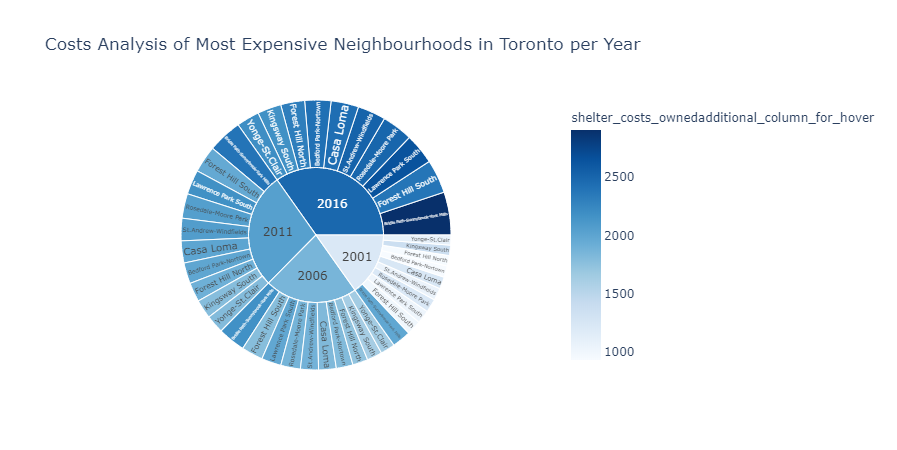

In [24]:
# Create new df for "shelter_costs_ownedadditional_column_for_hover"
top_10_expensive_neighbourhoods_df['shelter_costs_ownedadditional_column_for_hover'] = top_10_expensive_neighbourhoods_df['shelter_costs_owned']

# Create the sunburst chart
fig =px.sunburst(
    top_10_expensive_neighbourhoods_df_combined_year,
    path=['year', 'neighbourhood'],
    hover_data = ['shelter_costs_owned', 'shelter_costs_rented'],
    values='average_house_value',
    color = 'shelter_costs_ownedadditional_column_for_hover',
    color_continuous_scale='Blues',
    title = "Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
)
fig.show()

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [25]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [26]:
# Calculate the mean values for each neighborhood
mean_values_for_each_neighborhood = to_data.groupby('neighbourhood').mean().reset_index()
mean_values_for_each_neighborhood.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [27]:
# Join the average values with the neighbourhood locations
combine_df = pd.merge(df_neighbourhood_locations,mean_values_for_each_neighborhood,on='neighbourhood')
combine_df.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [28]:
# Create a scatter mapbox to analyze neighbourhood info
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

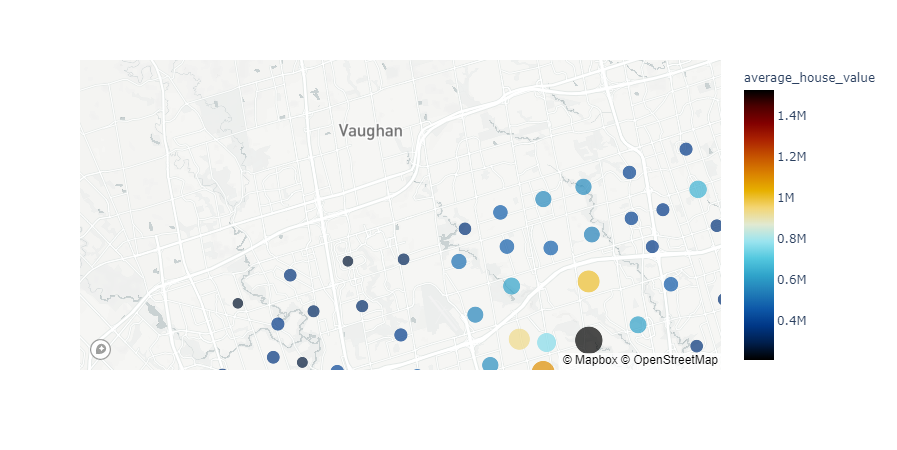

In [29]:
# Plot Data
map = px.scatter_mapbox(
    combine_df,
    lat="lat",
    lon="lon",
    hover_data = ['shelter_costs_owned', 
                  'shelter_costs_rented', 
                  'single_detached_house', 
                  'apartment_five_storeys_plus', 
                  'movable_dwelling', 
                  'semi_detached_house', 
                  'row_house', 
                  'duplex', 
                  'apartment_five_storeys_less', 
                  'other_house'],
    size="average_house_value",
    color="average_house_value",
    title="Average House value in Toronto",
    zoom=9,
    color_continuous_scale=px.colors.cyclical.IceFire
)

# Display the map
map.show()